In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/insurance.csv")

In [4]:
#display first rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print(data['age'].describe())

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#Code for handlling with Null values
data['age'].fillna(data['age'].mean(),inplace=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
import matplotlib.pyplot as plt

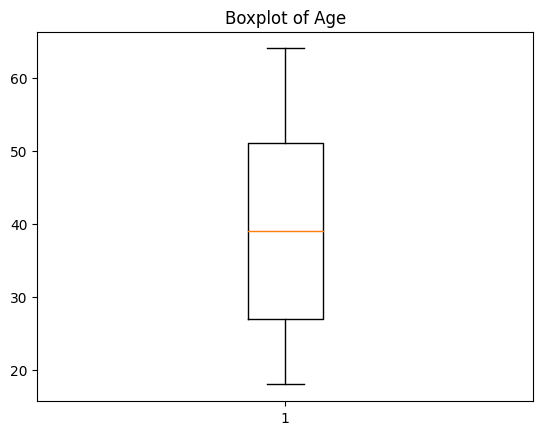

In [13]:
# Visualize the distribution of the 'age' column using a box plotplt.boxplot(data['age'])
plt.boxplot(data['age'])
plt.title('Boxplot of Age')
plt.show()

In [15]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
# Identify outliers
outliers = data[(data['age'] < lower_bound) ]
print("Number of outliers:", len(outliers))

Number of outliers: 0


In [28]:
# Clean outliers by either removing or imputing them
cleaned_data= data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

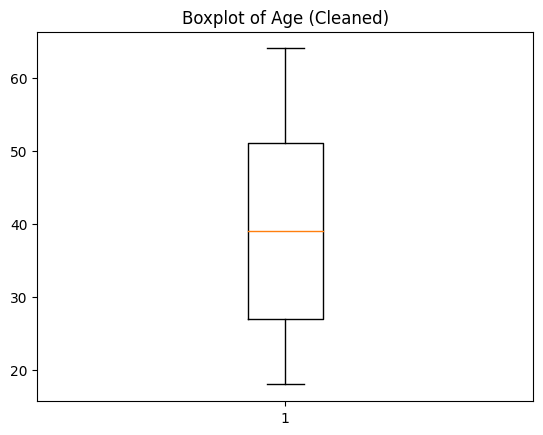

In [29]:
plt.boxplot(cleaned_data['age'])
plt.title('Boxplot of Age (Cleaned)')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
from sklearn.preprocessing import LabelEncoder

In [68]:
categorical_cols = ['age','sex','children','smoker','region','charges']

In [62]:
label_encoder = LabelEncoder()

In [63]:
for col in categorical_cols:
    cleaned_data[col] = label_encoder.fit_transform(cleaned_data[col])


In [75]:
cleaned_data['sex'] = cleaned_data['sex'].astype(float )

In [69]:
# Check for any missing values
print(X.isnull().sum())
print(y.isnull().sum())


age         0
sex         0
children    0
smoker      0
region      0
charges     0
dtype: int64
0


In [70]:
# Check the data types
print(X.dtypes)
print(y.dtypes)

age           int64
sex          object
children      int64
smoker       object
region       object
charges     float64
dtype: object
float64


In [85]:
# Check the shapes of X and y
print(X.shape)
print(y.shape)

(1338, 1)
(1338,)


In [84]:
X = cleaned_data[['sex']]
y = cleaned_data['bmi']


In [83]:
# Preparing the data for linear regression
X = data[['age', 'sex','children','smoker','region','charges']]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [81]:
# Initialize the model
model = LinearRegression()


In [86]:
model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Making predictions
y_pred = model.predict(X_test)


In [90]:
mse = mean_squared_error(y_test, y_pred)


In [93]:
from sklearn.metrics import accuracy_score

In [97]:
# Making predictions
y_pred = model.predict(X_test)

In [102]:
y_test = y_train
y_train = y_train[:len(y_test)]

In [103]:
#Calculate the accuracy score
score = accuracy_score(y_test, y_train)

In [104]:
print(score)

1.0
